In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Load the data and store into a dataframe and display some basic info about the data

In [83]:
df = pd.read_csv('Spring_FTX_Blue_Cards.csv')
#df.info()

<h3> Get rid of the non-essential columns and display the dataframe

In [84]:
df = df.drop(['Brevities','Unnamed: 13','Unnamed: 15','Positions','Raters'], axis=1)
#df.head()

In [85]:
### Filter cadets per school
df_GIT = df[df.School == 'GIT']
df_KSU = df[df.School == 'KSU']
df_EMORY = df[df.School == 'EMORY']
df_ASC = df[df.School == 'ASC']

In [86]:
### Count the number of cadets in each school
n = df['School'].value_counts()
#n

In [87]:
# Display the Assesment occurences
grades = df['OverallAssessment'].value_counts()
grades = grades[['E','P','C','U']]

Text(0, 0.5, 'Quantity')

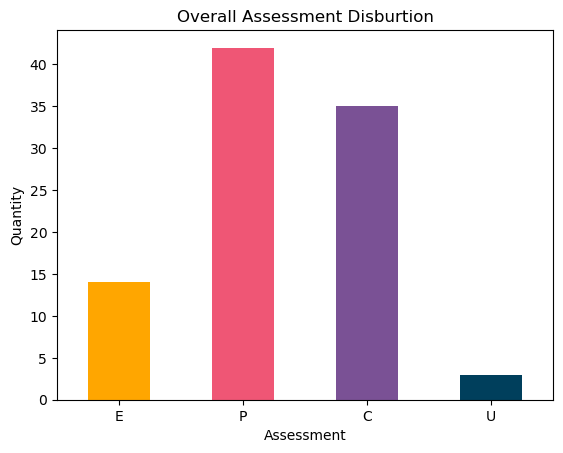

In [88]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Overall Assessment Disburtion');
plt.xlabel('Assessment')
plt.ylabel('Quantity')

<Figure size 800x600 with 0 Axes>

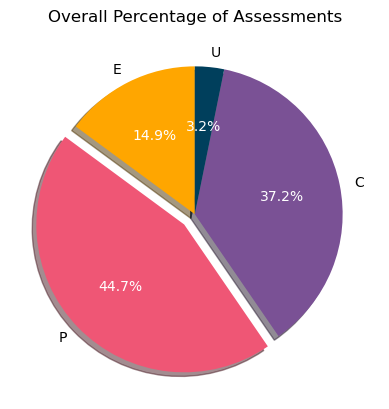

In [89]:
plt.figure(figsize=(8,6));
explode = (0,0.1,0,0)
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(grades,labels = grades.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('Overall Percentage of Assessments');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

In [90]:
#Grade v Position
grades_pos = df.groupby('OverallAssessment')['RatedPos'].value_counts()
grades_pos = grades_pos.unstack(level=1)
grades_pos = grades_pos.reindex(['E','P','C','U'])
grades_pos

RatedPos,PL,PSG,SL
OverallAssessment,,,
E,4,2,8
P,17,11,14
C,14,5,16
U,1,1,1


In [91]:
total = grades_pos.PL.sum() + grades_pos.PSG.sum() + grades_pos.SL.sum()
E_total = grades_pos.loc['E'].sum()
E_series = grades_pos.loc['E']
E_per = E_series/E_total

In [92]:
E_per

RatedPos
PL     0.285714
PSG    0.142857
SL     0.571429
Name: E, dtype: float64

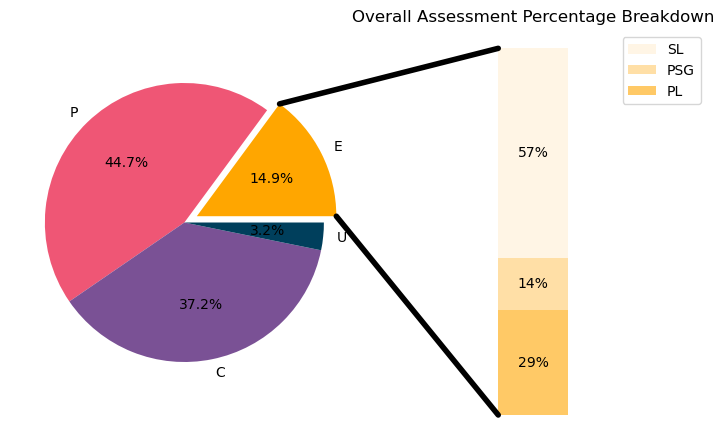

In [114]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
labels = ['E', 'P', 'C']
explode = [0.1, 0, 0,0]
# rotate so that first wedge is split by the x-axis
angle = -180 * grades[0]
wedges, *_ = ax1.pie(grades, autopct='%1.1f%%',colors = colors, startangle=angle,
                     labels=grades.index, explode=explode)

# bar chart parameters
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(E_per, E_series.index)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='#ffa600', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title("Overall Assessment Percentage Breakdown")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [94]:
school_grades = df.groupby('School')['OverallAssessment'].value_counts()
school_grades = school_grades.unstack(level=1)
school_grades = school_grades[['E','P','C','U']]
#school_grades

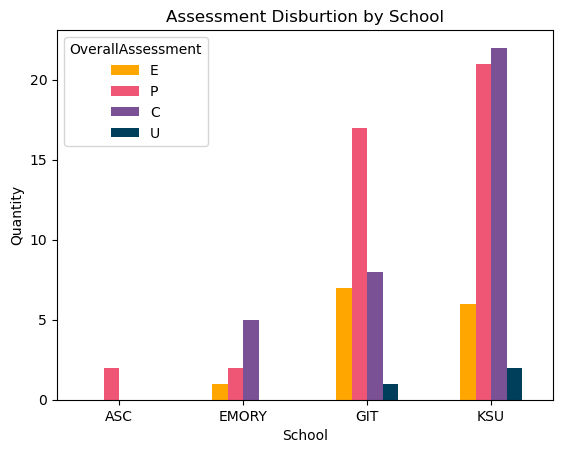

In [95]:
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
school_grades.plot(kind='bar', color = colors, rot = 0);
plt.title('Assessment Disburtion by School');
plt.ylabel('Quantity');

In [96]:
### Do this by rated postion filter

In [97]:
Sus1 = df['Sustain 1']
Sus2 = df['Sustain 2']
Sus3 = df['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df['Improve 1']
Imp2 = df['Improve 2']
Imp3 = df['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

In [98]:
Character_Imp_count = (Imp=='AV').sum() + (Imp=='EM').sum() + (Imp=='WE').sum() + (Imp=='DP').sum() + (Imp=='HU').sum()
Presence_Imp_count = (Imp=='MB').sum() + (Imp=='FT').sum() + (Imp=='CF').sum() + (Imp=='RS').sum()
Intellect_Imp_count = (Imp=='MA').sum() + (Imp=='SJ').sum() + (Imp=='IN').sum() + (Imp=='IT').sum() + (Imp=='EX').sum()
Lead_Imp_count = (Imp=='LD').sum() + (Imp=='BT').sum() + (Imp=='EI').sum() + (Imp=='LE').sum() + (Imp=='CO').sum()
Develop_Imp_count = (Imp=='CP').sum() + (Imp=='PS').sum() + (Imp=='DO').sum() + (Imp=='SP').sum()
Achieves_Imp_count = (Imp=='GR').sum()

labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop','Achieves']
imp_counts = [Character_Imp_count,Presence_Imp_count,Intellect_Imp_count,Lead_Imp_count,Develop_Imp_count,Achieves_Imp_count]
imp_df = pd.DataFrame(imp_counts,index = labels, columns = {'Counts'})

plt.figure(figsize=(8,6))
explode = (0,0,0.05,0,0,0)
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(imp_df.Counts,labels = imp_df.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('Percentage of Improvements by Category');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

In [99]:
Achieves_Imp_count
#print(Character_Imp_count)
#print(Presence_Imp_count)
#print(Intellect_Imp_count)
#print(Lead_Imp_count)
#print(Develop_Imp_count)

15

In [100]:
labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop','Achieves']
imp_counts = [Character_Imp_count,Presence_Imp_count,Intellect_Imp_count,Lead_Imp_count,Develop_Imp_count,Achieves_Imp_count]
imp_df = pd.DataFrame(imp_counts,index = labels, columns = {'Counts'})

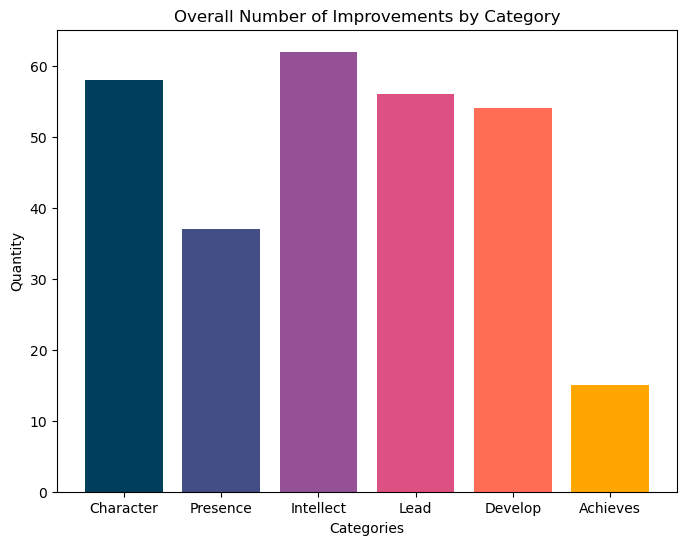

In [101]:
plt.figure(figsize=(8,6))
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
plt.bar(imp_df.index, imp_df.Counts, align='center', color = colors);
plt.title('Overall Number of Improvements by Category');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<Figure size 800x600 with 0 Axes>

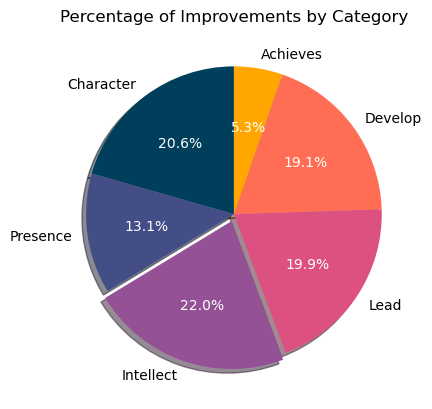

In [102]:
plt.figure(figsize=(8,6))
explode = (0,0,0.05,0,0,0)
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']

fig1, ax1 = plt.subplots();
patches, texts, autotexts = ax1.pie(imp_df.Counts,labels = imp_df.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors);
plt.title('Percentage of Improvements by Category');

for text in texts:
    text.set_color('black');
for autotext in autotexts:
    autotext.set_color('white');

<h3> GIT

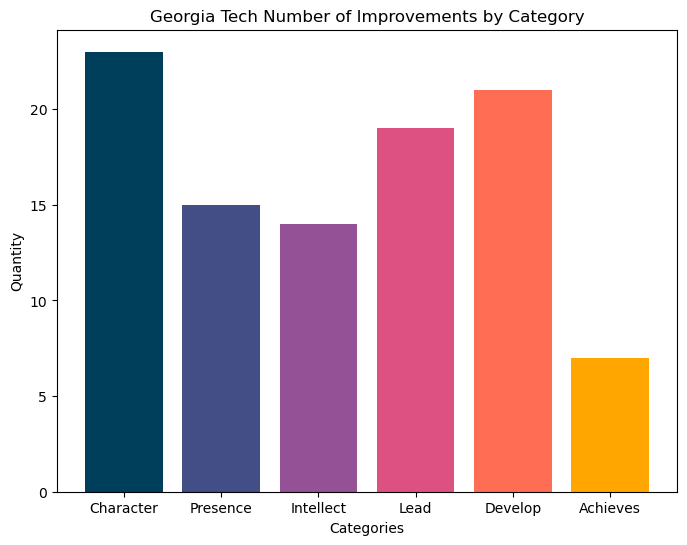

In [103]:
### Collect the Sustains and Improves for individual school
Sus1 = df_GIT['Sustain 1']
Sus2 = df_GIT['Sustain 2']
Sus3 = df_GIT['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_GIT['Improve 1']
Imp2 = df_GIT['Improve 2']
Imp3 = df_GIT['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

### Compute the sum of each leadership category for the IMPROVEMENTS
Character_Imp_count = (Imp=='AV').sum() + (Imp=='EM').sum() + (Imp=='WE').sum() + (Imp=='DP').sum() + (Imp=='HU').sum()
Presence_Imp_count = (Imp=='MB').sum() + (Imp=='FT').sum() + (Imp=='CF').sum() + (Imp=='RS').sum()
Intellect_Imp_count = (Imp=='MA').sum() + (Imp=='SJ').sum() + (Imp=='IN').sum() + (Imp=='IT').sum() + (Imp=='EX').sum()
Lead_Imp_count = (Imp=='LD').sum() + (Imp=='BT').sum() + (Imp=='EI').sum() + (Imp=='LE').sum() + (Imp=='CO').sum()
Develop_Imp_count = (Imp=='CP').sum() + (Imp=='PS').sum() + (Imp=='DO').sum() + (Imp=='SP').sum()
Achieves_Imp_count = (Imp=='GR').sum()

### Build the School's catgegorized DataFrame
labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop','Achieves']
imp_counts = [Character_Imp_count,Presence_Imp_count,Intellect_Imp_count,Lead_Imp_count,Develop_Imp_count,Achieves_Imp_count]
GIT_imp_df = pd.DataFrame(imp_counts,index = labels, columns = {'Counts'})

### Plot that school
plt.figure(figsize=(8,6))
colors = ['#003f5c', '#444e86', '#955196','#dd5182', '#ff6e54', '#ffa600']
plt.bar(GIT_imp_df.index, GIT_imp_df.Counts, align='center', color = colors);
plt.title('Georgia Tech Number of Improvements by Category');
plt.ylabel('Quantity');
plt.xlabel('Categories');

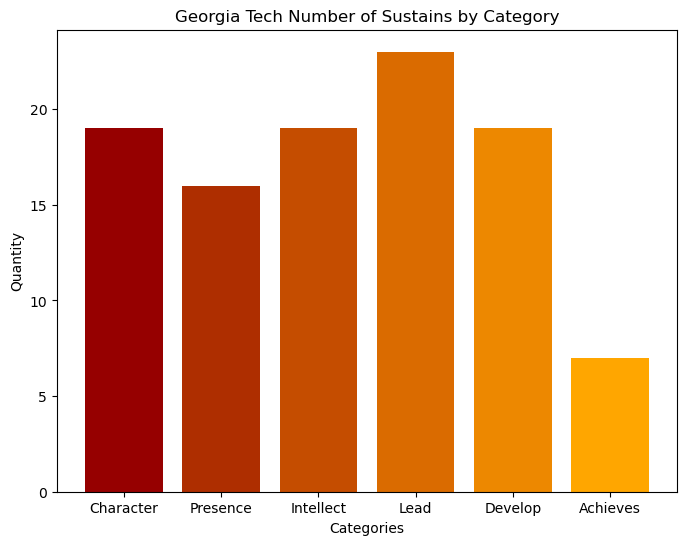

In [104]:
### Compute the sum of each leadership category for the SUSTAINMENTS
Character_Sus_count = (Sus=='AV').sum() + (Sus=='EM').sum() + (Sus=='WE').sum() + (Sus=='DP').sum() + (Sus=='HU').sum()
Presence_Sus_count = (Sus=='MB').sum() + (Sus=='FT').sum() + (Sus=='CF').sum() + (Sus=='RS').sum()
Intellect_Sus_count = (Sus=='MA').sum() + (Sus=='SJ').sum() + (Sus=='IN').sum() + (Sus=='IT').sum() + (Sus=='EX').sum()
Lead_Sus_count = (Sus=='LD').sum() + (Sus=='BT').sum() + (Sus=='EI').sum() + (Sus=='LE').sum() + (Sus=='CO').sum()
Develop_Sus_count = (Sus=='CP').sum() + (Sus=='PS').sum() + (Sus=='DO').sum() + (Sus=='SP').sum()
Achieves_Imp_count = (Imp=='GR').sum()

### Build the School's catgegorized DataFrame
labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop', 'Achieves']
Sus_counts = [Character_Sus_count,Presence_Sus_count,Intellect_Sus_count,Lead_Sus_count,Develop_Sus_count,Achieves_Imp_count]
GIT_Sus_df = pd.DataFrame(Sus_counts,index = labels, columns = {'Counts'})


### Plot that school
plt.figure(figsize=(8,6))
colors = ['#960000', '#ae2e00', '#c54d00','#da6b00', '#ed8800', '#ffa600']
plt.bar(GIT_Sus_df.index, GIT_Sus_df.Counts, align='center', color = colors);
plt.title('Georgia Tech Number of Sustains by Category');
plt.ylabel('Quantity');
plt.xlabel('Categories');

In [113]:
expanded_df = df
expanded_df[['AV','EM','WE','DP','HU','MB','FT','CF','RS','MA','SJ','IN','IT','EX','LD','BT','EI','LE','CO','CP','PS','DO','SP','GR']] = 0

In [ ]:
expanded_df.iloc(

<h3> Kennesaw State Univesity

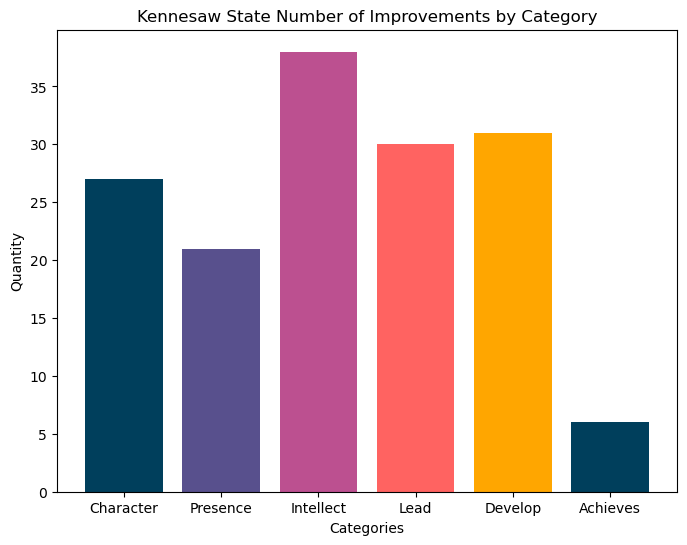

In [105]:
### Collect the Sustains and Improves for individual school
Sus1 = df_KSU['Sustain 1']
Sus2 = df_KSU['Sustain 2']
Sus3 = df_KSU['Sustain 3']
Sus = pd.concat([Sus1,Sus2,Sus3],ignore_index= True)
Imp1 = df_KSU['Improve 1']
Imp2 = df_KSU['Improve 2']
Imp3 = df_KSU['Improve 3']
Imp = pd.concat([Imp1,Imp2,Imp3],ignore_index= True)

### Compute the sum of each leadership category for the IMPROVEMENTS
Character_Imp_count = (Imp=='AV').sum() + (Imp=='EM').sum() + (Imp=='WE').sum() + (Imp=='DP').sum() + (Imp=='HU').sum()
Presence_Imp_count = (Imp=='MB').sum() + (Imp=='FT').sum() + (Imp=='CF').sum() + (Imp=='RS').sum()
Intellect_Imp_count = (Imp=='MA').sum() + (Imp=='SJ').sum() + (Imp=='IN').sum() + (Imp=='IT').sum() + (Imp=='EX').sum()
Lead_Imp_count = (Imp=='LD').sum() + (Imp=='BT').sum() + (Imp=='EI').sum() + (Imp=='LE').sum() + (Imp=='CO').sum()
Develop_Imp_count = (Imp=='CP').sum() + (Imp=='PS').sum() + (Imp=='DO').sum() + (Imp=='SP').sum()
Achieves_Imp_count = (Imp=='GR').sum()

### Build the School's catgegorized DataFrame
labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop', 'Achieves']
imp_counts = [Character_Imp_count,Presence_Imp_count,Intellect_Imp_count,Lead_Imp_count,Develop_Imp_count,Achieves_Imp_count]
KSU_imp_df = pd.DataFrame(imp_counts,index = labels, columns = {'Counts'})


### Plot that school
plt.figure(figsize=(8,6))
colors = ['#003f5c', '#58508d','#bc5090', '#ff6361', '#ffa600']
plt.bar(KSU_imp_df.index, KSU_imp_df.Counts, align='center', color = colors);
plt.title('Kennesaw State Number of Improvements by Category');
plt.ylabel('Quantity');
plt.xlabel('Categories');

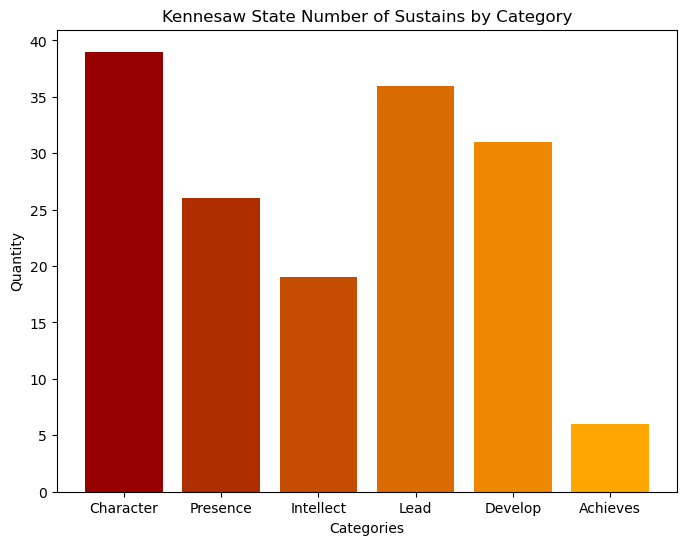

In [106]:
### Compute the sum of each leadership category for the SUSTAINMENTS
Character_Sus_count = (Sus=='AV').sum() + (Sus=='EM').sum() + (Sus=='WE').sum() + (Sus=='DP').sum() + (Sus=='HU').sum()
Presence_Sus_count = (Sus=='MB').sum() + (Sus=='FT').sum() + (Sus=='CF').sum() + (Sus=='RS').sum()
Intellect_Sus_count = (Sus=='MA').sum() + (Sus=='SJ').sum() + (Sus=='IN').sum() + (Sus=='IT').sum() + (Sus=='EX').sum()
Lead_Sus_count = (Sus=='LD').sum() + (Sus=='BT').sum() + (Sus=='EI').sum() + (Sus=='LE').sum() + (Sus=='CO').sum()
Develop_Sus_count = (Sus=='CP').sum() + (Sus=='PS').sum() + (Sus=='DO').sum() + (Sus=='SP').sum()
Achieves_Imp_count = (Imp=='GR').sum()

### Build the School's catgegorized DataFrame
labels = ['Character', 'Presence', 'Intellect', 'Lead', 'Develop', 'Achieves']
Sus_counts = [Character_Sus_count,Presence_Sus_count,Intellect_Sus_count,Lead_Sus_count,Develop_Sus_count,Achieves_Imp_count]
KSU_Sus_df = pd.DataFrame(Sus_counts,index = labels, columns = {'Counts'})


### Plot that school
plt.figure(figsize=(8,6))
colors = ['#960000', '#ae2e00', '#c54d00','#da6b00', '#ed8800', '#ffa600']
plt.bar(KSU_Sus_df.index, KSU_Sus_df.Counts, align='center', color = colors);
plt.title('Kennesaw State Number of Sustains by Category');
plt.ylabel('Quantity');
plt.xlabel('Categories');

<h3> Cadre breakdown

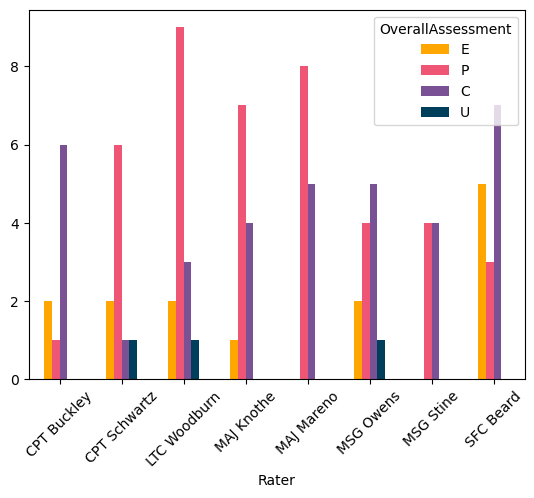

In [107]:
cadre_df = df.groupby('Rater')['OverallAssessment'].value_counts().unstack(level=1)
cadre_df = cadre_df[['E','P','C','U']]
colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
cadre_df.plot(kind='bar', color = colors, rot = 45);

In [108]:
cadre_df

OverallAssessment,E,P,C,U
Rater,,,,
CPT Buckley,2.0,1.0,6.0,NaN
CPT Schwartz,2.0,6.0,1.0,1.0
LTC Woodburn,2.0,9.0,3.0,1.0
MAJ Knothe,1.0,7.0,4.0,NaN
MAJ Mareno,NaN,8.0,5.0,NaN
MSG Owens,2.0,4.0,5.0,1.0
MSG Stine,NaN,4.0,4.0,NaN
SFC Beard,5.0,3.0,7.0,NaN


<h3> Position Filter, By School

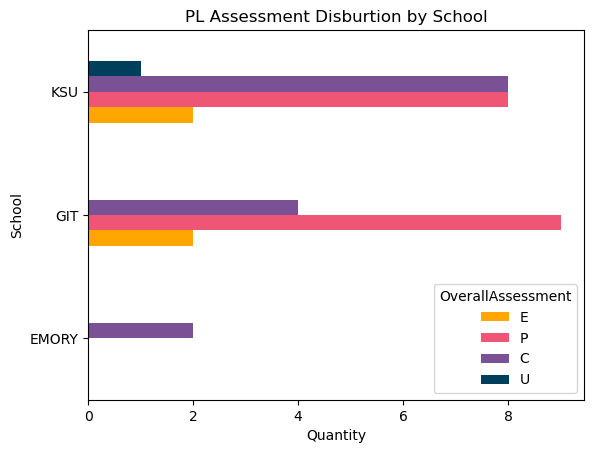

In [63]:
PL_filter = df[df.RatedPos == 'PL'].reset_index()
PSG_filter = df[df.RatedPos == 'PSG'].reset_index()
SL_filter = df[df.RatedPos == 'SL'].reset_index()

PL_school_grades = PL_filter.groupby('School')['OverallAssessment'].value_counts()
PL_school_grades = PL_school_grades.unstack(level=1)
PL_school_grades = PL_school_grades[['E','P','C','U']]
PL_school_grades

colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
PL_school_grades.plot(kind='barh', color = colors, rot = 0);
plt.title('PL Assessment Disburtion by School');
plt.ylabel('School');
plt.xlabel('Quantity');

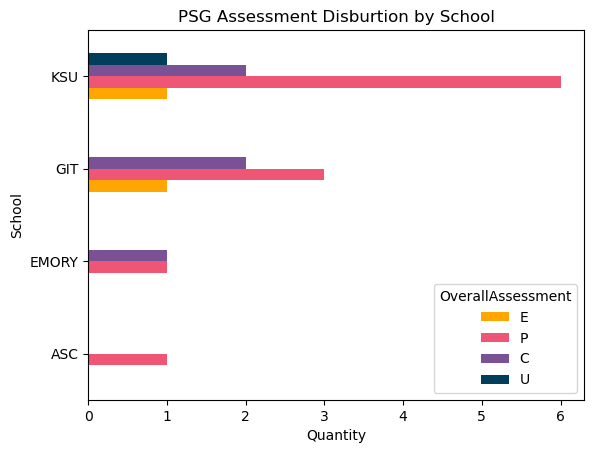

In [61]:
PSG_school_grades = PSG_filter.groupby('School')['OverallAssessment'].value_counts()
PSG_school_grades = PSG_school_grades.unstack(level=1)
PSG_school_grades = PSG_school_grades[['E','P','C','U']]
PSG_school_grades

colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
PSG_school_grades.plot(kind='barh', color = colors, rot = 0);
plt.title('PSG Assessment Disburtion by School');
plt.ylabel('School');
plt.xlabel('Quantity');

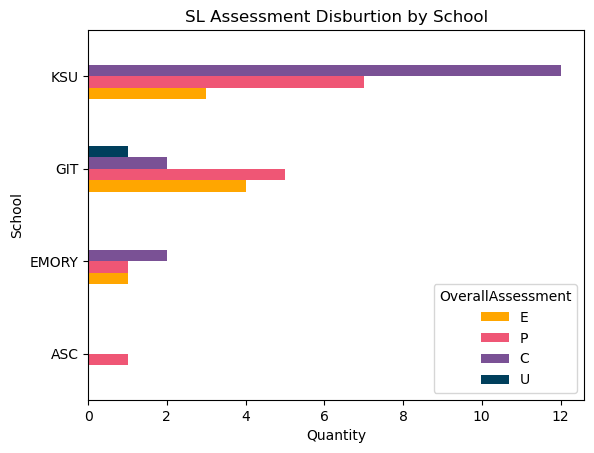

In [62]:
SL_school_grades = SL_filter.groupby('School')['OverallAssessment'].value_counts()
SL_school_grades = SL_school_grades.unstack(level=1)
SL_school_grades = SL_school_grades[['E','P','C','U']]
SL_school_grades

colors = ['#ffa600','#ef5675','#7a5195','#003f5c']
SL_school_grades.plot(kind='barh', color = colors, rot = 0);
plt.title('SL Assessment Disburtion by School');
plt.ylabel('School');
plt.xlabel('Quantity');

<h3> What are some useful metrics that BN COs might want to see?

1. What were the overall assessments of the FTX? (# of E,P,C,U & percentages)
2. What were the overall assessments of the FTX by school? (# of E,P,C,U & percentages)
3. How did the schools match up against each other?
4. What were the trends in the Sustainments & Improvements?
5. What were the trends in the Sustainments & Improvements by school?
6. Cadre grading, was it "too lenient" or "too harsh"?
7. How consistent was each cadre member with grading?
8. How well did cadets perform by each graded position?